In [148]:
#Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

In [2]:
#Import all the dataset
churn_data = pd.read_csv('Telecom Churn/churn_data.csv')
churn_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Import customer data
customer_data = pd.read_csv('Telecom Churn/customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
#Import Internet data
internet_data = pd.read_csv("Telecom Churn/internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
#Merge all the datase into one
df1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')
telecom = pd.merge(df1, internet_data, how='inner', on='customerID')

In [6]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
#shape of the dataset
telecom.shape

(7043, 21)

In [8]:
#Lets look at the statistical aspect of df
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [9]:
#datatype of all features
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [11]:
pd.set_option('display.max_columns', None)

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [14]:
#Convert binary feature to 0/1 instead Yes/No
varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

In [13]:
#Funtion to map yes to 1 and No to 0
def binary_map(x):
    return x.map({'Yes':1, "No":0})

In [15]:
telecom[varlist] = telecom[varlist].apply(binary_map)

In [17]:
#For categorical variables with multiple levels, create dummy feature - one hot encoding
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']], drop_first=True)
#Adding the results to the master df
telecom = pd.concat([telecom, dummy1], axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,False,False,False,True,False,False,True,False


In [19]:
#Let have a look into the subscription based features counts
telecom.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [20]:
telecom.OnlineBackup.value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [22]:
telecom.DeviceProtection.value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [23]:
telecom.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [24]:
telecom.StreamingMovies.value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [35]:
telecom.TechSupport.value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [ ]:
#Creating dummy variable for remaining features, and lets drop big names
m1 = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
m2 = m1.drop(['MultipleLines_No phone service'], axis=1)
telecom = pd.concat([telecom, m2], axis=1)

os1 = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os2 = os1.drop(['OnlineSecurity_No internet service'], axis=1)
telecom = pd.concat([telecom, os2], axis=1)

ob1 = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob2 = ob1.drop(['OnlineBackup_No internet service'], axis=1)
telecom = pd.concat([telecom, ob2], axis=1)

dp1 = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp2 = dp1.drop(['DeviceProtection_No internet service'], axis=1)
telecom = pd.concat([telecom, dp2], axis=1)

ts1 = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts2 = ts1.drop(['TechSupport_No internet service'], axis=1)
telecom = pd.concat([telecom, ts2], axis=1)

st1 = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st2 = st1.drop(['StreamingTV_No internet service'], axis=1)
telecom = pd.concat([telecom, st2], axis=1)

sm1 = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm2 = sm1.drop(['StreamingMovies_No internet service'], axis=1)
telecom = pd.concat([telecom, sm2], axis=1)

In [37]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [39]:
#Lets drop all the repeated variables
telecom = telecom.drop(['Contract', 'PaymentMethod', 'gender', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [40]:
#Lets convert total charges feature to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [41]:
#Check for outliers
num_feat_telecom = telecom[['tenure', 'MonthlyCharges','SeniorCitizen', 'TotalCharges']]
#Checking outlier at 25, 50, 75, 90, 95, 99
num_feat_telecom.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


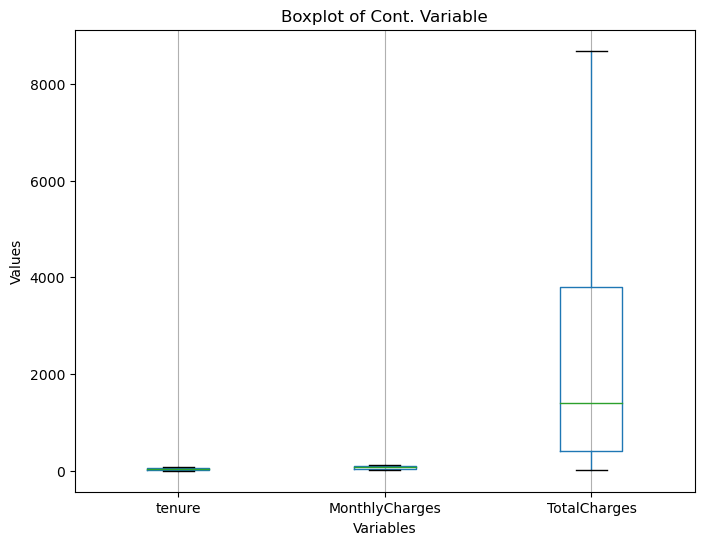

In [43]:
#Plotting the box plot to check outliers
num_feat_telecom = telecom[['tenure', 'MonthlyCharges', 'TotalCharges']]

#Set the fig size
plt.figure(figsize=(8,6))
num_feat_telecom.boxplot()
plt.title('Boxplot of Cont. Variable')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(axis='y')
plt.show()

In [44]:
#Checking missing data
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [45]:
#Removing Nan where TotalCharges is Null
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [46]:
#Checking missing data
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [58]:
col = ['Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male','InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes']
telecom[col] = telecom[col].astype(int)

In [59]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [60]:
#Train test split
X = telecom.drop(['Churn', 'customerID'], axis=1)
y = telecom['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
#Scale our dataset
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges', 'TotalCharges']])

In [63]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [64]:
#Check the churn rate
(sum(telecom['Churn'])/len(telecom['Churn'].index))*100

26.578498293515356

In [65]:
%matplotlib inline

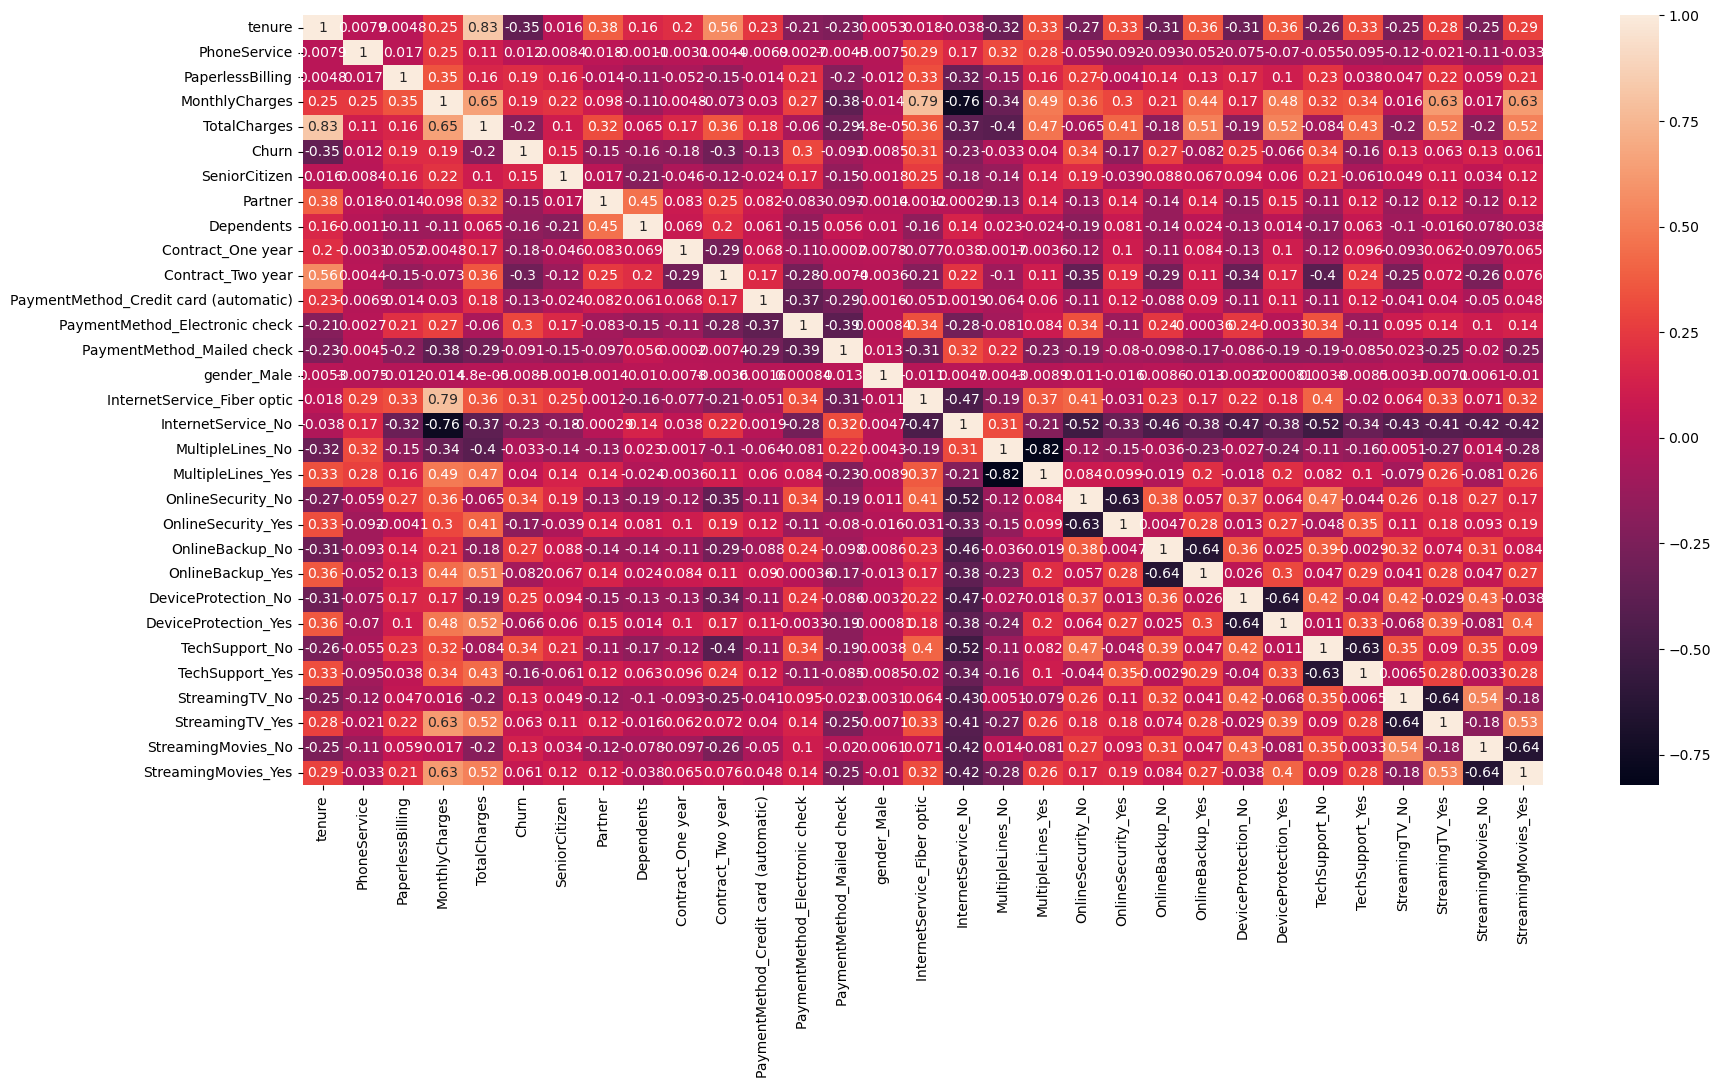

In [68]:
#Plot the corrlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(telecom.drop(columns=['customerID']).corr(), annot=True)
plt.show()

In [72]:
#Lets drop highly correlated dummy variables
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No',
                     'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'], axis=1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No',
                     'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'], axis=1)

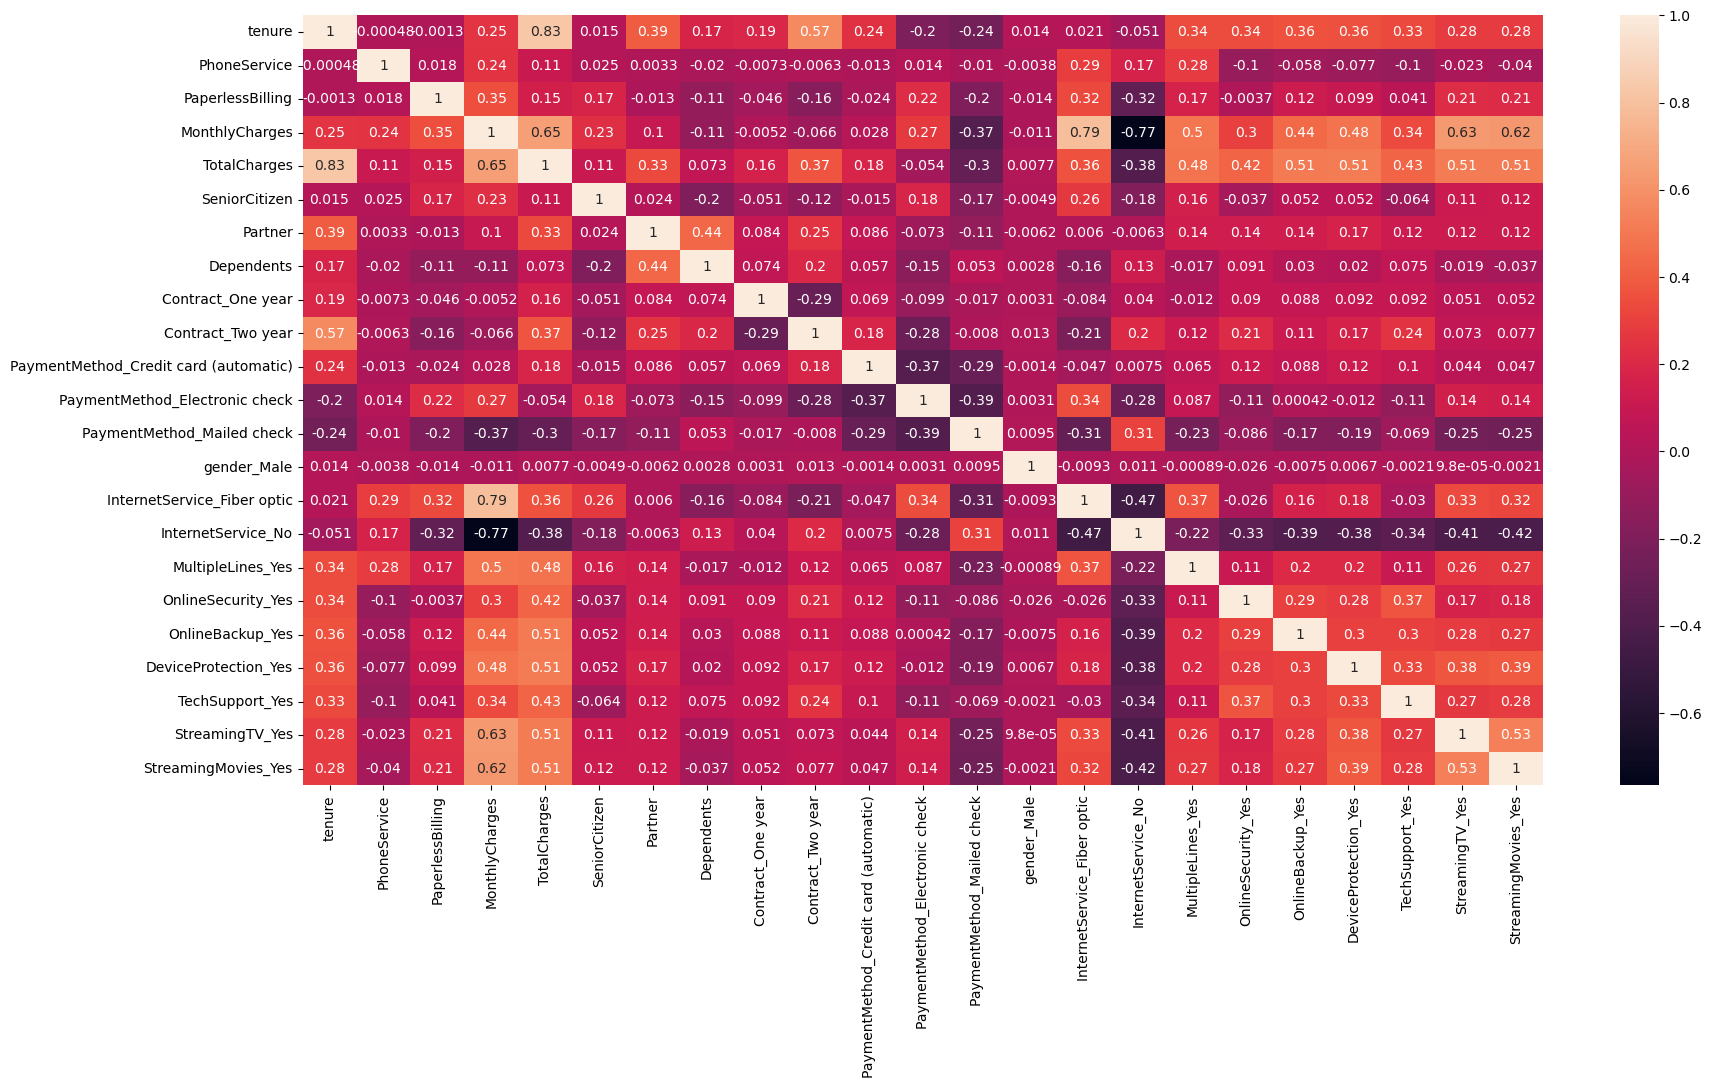

In [73]:
#Plot the corrlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [76]:
#Logistic Regression
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 20 Dec 2023   Deviance:                       4009.4
Time:                        21:02:06   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [89]:
#Creating instance for Sklearn Logistic Regr. for RFE
logreg = LogisticRegression()

In [90]:
#Create instance for RFE
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [91]:
rfe.support_

array([ True, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 7),
 ('PaperlessBilling', False, 4),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 10),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 12),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 6),
 ('OnlineBackup_Yes', False, 9),
 ('DeviceProtection_Yes', False, 13),
 ('TechSupport_Yes', False, 5),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [93]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

In [94]:
#Asses the model with statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.3
Date:                Wed, 20 Dec 2023   Deviance:                       4062.5
Time:                        21:20:00   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2766
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4327      0.158    -15.402      0.000      -2.742      -2.123
tenure                         -1.4711      0.184     -8.010      0.000      -1.831      -1.111
MonthlyCharges                 -1.1549      0.184     -6.279      0.000      -1.515      -0.794
TotalCharges                    0.6548      0.195      3.359      0.001       0.273       1.037
SeniorCitizen                   0.4891      0.099      4.956      0.000       0.296       0.683
Contract_One year              -0.7616      0.127     -6.018      0.000      -1.010      -0.514
Contract_Two year              -1.4601      0.207     -7.044      0.000      -1.866      -1.054
InternetService_Fiber optic     1.9337      0.196      9.859      0.000       1.549       2.318
InternetService_No             -1.9165      0.211     -9.089      0.000      -2.330      -1.503
MultipleLines_Yes               0.4522      0.102      4.451      0.000       0.253       0.651
StreamingTV_Yes                 0.6792      0.111      6.119      0.000       0.462       0.897
StreamingMovies_Yes             0.5596      0.109      5.140      0.000       0.346       0.773
===============================================================================================
"""

In [95]:
#Get the predicted values of train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.141849
5790    0.234950
6498    0.520938
880     0.498011
2784    0.651654
3874    0.319438
5387    0.492438
6623    0.776976
4465    0.179572
5364    0.547303
dtype: float64

In [96]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14184908, 0.23495033, 0.52093813, 0.49801078, 0.65165382,
       0.31943794, 0.49243768, 0.77697601, 0.17957212, 0.54730313])

In [97]:
#Creating a df with the actual churn flag and the predicted probability

y_train_pred_final = pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustId'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustId
0,0,0.141849,879
1,0,0.234950,5790
2,1,0.520938,6498
3,1,0.498011,880
4,1,0.651654,2784


In [98]:
#Creating a new feature 'predicted' with 1 if prob>0.5
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x >0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustId,predicted
0,0,0.141849,879,0
1,0,0.234950,5790,0
2,1,0.520938,6498,1
3,1,0.498011,880,0
4,1,0.651654,2784,1


In [100]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3257  378]
 [ 593  694]]


In [ ]:
#Predicted             #not Churn          #churn
#Actual                                
#Not Churn              3257                378
#Churn                  593                 694

In [101]:
#Lets check accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8027224705404307


In [103]:
#Check for VIF values of the feature variable
vif = pd.DataFrame()
vif['feature'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
1,MonthlyCharges,12.77
2,TotalCharges,10.09
0,tenure,6.77
7,InternetService_No,4.88
6,InternetService_Fiber optic,4.42
5,Contract_Two year,2.63
9,StreamingTV_Yes,2.61
10,StreamingMovies_Yes,2.61
8,MultipleLines_Yes,2.25
4,Contract_One year,1.66


In [105]:
col = col.drop('MonthlyCharges', 1)

In [106]:
#Lets re run the model and check the performance
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.3
Date:                Wed, 20 Dec 2023   Deviance:                       4102.7
Time:                        21:37:15   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2707
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7295      0.105    -16.454      0.000      -1.935      -1.523
tenure                         -1.1578      0.175     -6.622      0.000      -1.501      -0.815
TotalCharges                    0.2282      0.181      1.257      0.209      -0.127       0.584
SeniorCitizen                   0.5399      0.098      5.500      0.000       0.347       0.732
Contract_One year              -0.8448      0.125     -6.741      0.000      -1.090      -0.599
Contract_Two year              -1.5718      0.206     -7.628      0.000      -1.976      -1.168
InternetService_Fiber optic     0.9129      0.104      8.803      0.000       0.710       1.116
InternetService_No             -0.9741      0.150     -6.504      0.000      -1.268      -0.681
MultipleLines_Yes               0.2098      0.093      2.265      0.024       0.028       0.391
StreamingTV_Yes                 0.3257      0.095      3.430      0.001       0.140       0.512
StreamingMovies_Yes             0.2276      0.094      2.409      0.016       0.042       0.413
===============================================================================================
"""

In [107]:
#Get the predicted values of train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.16720396, 0.17428949, 0.61073896, 0.66263764, 0.70960979,
       0.30832111, 0.35420237, 0.76843759, 0.11643261, 0.55894329])

In [110]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [111]:
#Creating a new feature 'predicted' with 1 if prob>0.5
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x >0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustId,predicted
0,0,0.167204,879,0
1,0,0.174289,5790,0
2,1,0.610739,6498,1
3,1,0.662638,880,1
4,1,0.709610,2784,1


In [112]:
#Lets check accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8015034538805363


In [113]:
#Iter 3
#Check for VIF values of the feature variable
vif = pd.DataFrame()
vif['feature'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
1,TotalCharges,7.08
0,tenure,6.45
5,InternetService_Fiber optic,2.59
9,StreamingMovies_Yes,2.51
8,StreamingTV_Yes,2.50
4,Contract_Two year,2.47
7,MultipleLines_Yes,2.20
6,InternetService_No,2.14
3,Contract_One year,1.54
2,SeniorCitizen,1.29


In [114]:
col = col.drop('TotalCharges', 1)

In [115]:
#Lets re run the model and check the performance
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

#Get the predicted values of train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

y_train_pred_final['Churn_Prob'] = y_train_pred

#Creating a new feature 'predicted' with 1 if prob>0.5
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x >0.5 else 0)
y_train_pred_final.head()

#Lets check accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8000812677773262


In [116]:
#Iter 4
#Check for VIF values of the feature variable
vif = pd.DataFrame()
vif['feature'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
8,StreamingMovies_Yes,2.45
7,StreamingTV_Yes,2.43
4,InternetService_Fiber optic,2.41
3,Contract_Two year,2.40
6,MultipleLines_Yes,2.18
0,tenure,1.72
5,InternetService_No,1.67
2,Contract_One year,1.53
1,SeniorCitizen,1.28


In [117]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3271  364]
 [ 620  667]]


In [118]:
#Metrics
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [119]:
#Lets see the sensitivity for out model
TP/float(TP+FN)

0.5182595182595182

In [120]:
#Lets check specificity
TN/float(TN+FP)

0.8998624484181568

In [122]:
#Lets see false positive rates
FP/float(TN+FP)

0.10013755158184319

In [123]:
#Lets see the negative predicive rate
TN/float(TN+FN)

0.8406579285530712

In [127]:
#Plotting AUC and ROC Curve
def draw_roc(actual, probs):
    fpr, tpr, threshold = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [128]:
fpr, tpr, threshold = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.predicted, drop_intermediate=False)

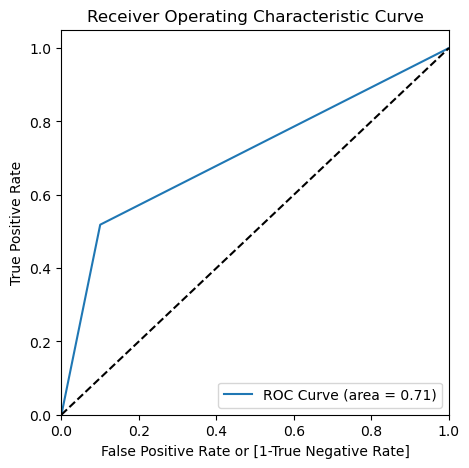

In [129]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [131]:
#Finding the best optimal cutoff point
#Create a column with different probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()    

,Churn,Churn_Prob,CustId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.176225,879,0,1,1,0,0,0,0,0,0,0,0
1,0,0.191759,5790,0,1,1,0,0,0,0,0,0,0,0
2,1,0.609029,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.667823,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.717513,2784,1,1,1,1,1,1,1,1,1,0,0


In [135]:
#Now lets calculate accuracy for sensitivity and specificity fir various probability
cuttoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cuttoff_df.loc[i] = [i,accuracy,sensi, speci]

In [136]:
cuttoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.608899,0.945610,0.489684
0.2,0.2,0.718813,0.850039,0.672352
0.3,0.3,0.764323,0.787879,0.755983
0.4,0.4,0.788094,0.628594,0.844567
0.5,0.5,0.800081,0.518260,0.899862
0.6,0.6,0.802519,0.383061,0.951032
0.7,0.7,0.771638,0.174825,0.982944
0.8,0.8,0.744819,0.028749,0.998349
0.9,0.9,0.738521,0.000000,1.000000


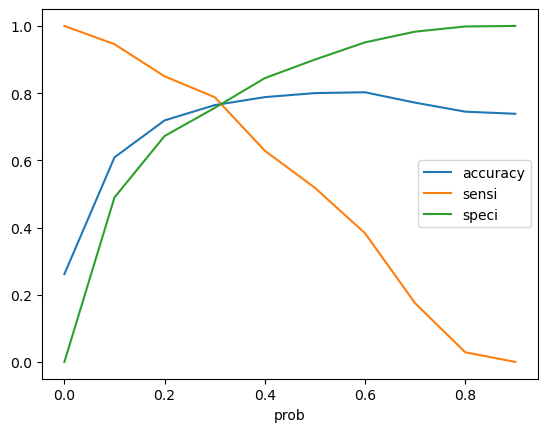

In [137]:
#Lets plot accuracy sensitivity and specificity for various probabilities
cuttoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

In [138]:
y_train_pred_final['final_pred'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
0,0,0.176225,879,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.191759,5790,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.609029,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.667823,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.717513,2784,1,1,1,1,1,1,1,1,1,0,0,1


In [139]:
#Lets check accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_pred))

0.7643234457537587


In [140]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_pred)
print(confusion2)

[[2748  887]
 [ 273 1014]]


In [141]:
#Metrics
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [142]:
#Lets see the sensitivity for out model
TP/float(TP+FN)

0.7878787878787878

In [143]:
#Lets check specificity
TN/float(TN+FP)

0.7559834938101788

In [144]:
#Lets see false positive rates
FP/float(TN+FP)

0.24401650618982118

In [145]:
#Lets see the negative predicive rate
TN/float(TN+FN)

0.9096325719960278

In [146]:
#Precision 
confusion[1,1] / (confusion[0,1]+confusion[1,1])

0.646944713870029

In [147]:
#& Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5182595182595182

In [149]:
#Precision Recall Curve
p, r, threshold2 = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.final_pred)

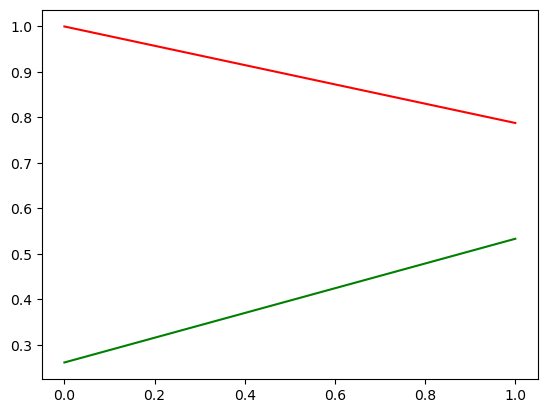

In [150]:
plt.plot(threshold2, p[:-1], "g-")
plt.plot(threshold2, r[:-1], "r-")
plt.show()

In [151]:
#Lets make the prediction on test set
X_test[['tenure', 'MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges','TotalCharges']])

In [152]:
X_test = X_test[col]

In [154]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [155]:
#Converting the y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
y_pred_1

,0
942,0.450206
3730,0.288317
1761,0.006397
2283,0.609029
1872,0.009828
...,...
1289,0.027930
3508,0.049353
6765,0.004176
3598,0.503662


In [157]:
#Convert the y_test to df
y_test_df = pd.DataFrame(y_test)

#Put the custID
y_test_df['CustID'] = y_test_df.index

In [159]:
#Removing index for both df to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [161]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.450206
1,1,3730,0.288317
2,0,1761,0.006397
3,1,2283,0.609029
4,0,1872,0.009828


In [162]:
y_pred_final.rename(columns={0:'Churn_Prob'}, inplace=True)

In [164]:
y_pred_final = y_pred_final[['CustID', 'Churn', 'Churn_Prob']]

In [165]:
y_pred_final['final_pred'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x>0.46 else 0)

C:\Users\ramsu\AppData\Local\Temp\ipykernel_1352\3658353651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_final['final_pred'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x>0.46 else 0)


In [166]:
#Lets check accuracy
print(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_pred))

0.7748815165876777
